In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers import *
from keras.models import *
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

# LOAD AND PREPROCESS DATA

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [ ]:
print('X Train Shape :', X_train.shape)
print('X Test Shape :', X_test.shape)

X Train Shape : (60000, 28, 28)
X Test Shape : (10000, 28, 28)


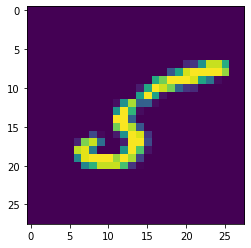

In [ ]:
# convert pixels to image
plt.imshow(X_train[11])

In [ ]:
# Set numeric type to float32
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [ ]:
# first bring all the values to 0 to 1 
# this helps to converge the model faster
# this is also called Normalization

X_train=X_train/255
X_test=X_test/255

In [ ]:
# convert outlabels into categorical 
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# MODEL BUILDING

In [ ]:
model=Sequential()

#LAYER 1
#Convolution Layer1
model.add(Conv2D(filters=6,kernel_size=5,strides=1,activation='sigmoid',input_shape=(28,28,1)))
# Pooling Layer 1
model.add(MaxPooling2D(pool_size=2,strides=2))

#LAYER 2
# Conv Layer 2
model.add(Conv2D(filters=16,kernel_size=5,strides=1,activation='sigmoid',input_shape=(14,14,6)))
#Pooling Layer 2
model.add(MaxPooling2D(pool_size=2,strides=2))
#Flatten
model.add(Flatten())

# LAYER 3
#Fully connected Layer 1
model.add(Dense(120,activation='sigmoid'))

# LAYER 4
#Fully connected Layer 2
model.add(Dense(84,activation='sigmoid'))

#Layer 5
#Output Layer
model.add(Dense(10,activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [ ]:
history=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_test,y_test),verbose=1)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.6590 - accuracy: 0.7918 - val_loss: 0.1448 - val_accuracy: 0.9574
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1194 - accuracy: 0.9633 - val_loss: 0.0779 - val_accuracy: 0.9765
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0818 - accuracy: 0.9743 - val_loss: 0.0655 - val_accuracy: 0.9787
Epoch 4/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0646 - accuracy: 0.9800 - val_loss: 0.0559 - val_accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0551 - accuracy: 0.9829 - val_loss: 0.0564 - val_accuracy: 0.9810
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0480 - accuracy: 0.9849 - val_loss: 0.0421 - val_accuracy: 0.9855
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0424 - accuracy: 0.9869 - val_loss: 0.0464 -

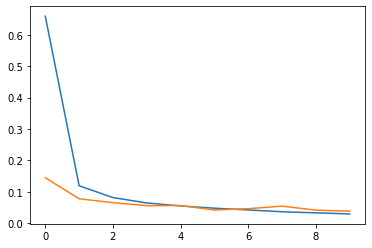

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# PREDICTIONS

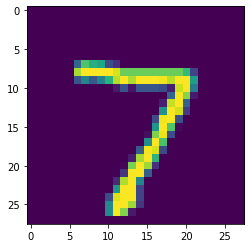

In [ ]:
plt.imshow(X_test[0])

In [ ]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

array([7])

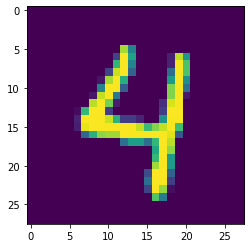

In [ ]:
plt.imshow(X_test[27])

In [ ]:
model.predict(X_test[27].reshape(1,28,28)).argmax(axis=1)

array([4])

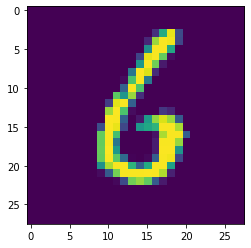

In [ ]:
plt.imshow(X_test[50])

In [ ]:
model.predict(X_test[50].reshape(1,28,28)).argmax(axis=1)

array([6])